In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [18]:
def f(x: float) -> float: # Исходная функция
    return x ** 4 - np.sqrt(x + 1) - 3

In [19]:
def derivative_f(x: float) -> float: # Производная функции
    return 4 * x ** 3 + 1 / (2 * np.sqrt(x + 1))

In [20]:
def second_derivative_f(x: float) -> float: # Вторая производная функции
    return 12 * x ** 2 - 1 / 4 * (x + 1) ** (-3 / 2)

In [21]:
def abs_derivative_f(x: float) -> float: # Абсолютное значение производной функции
    return abs(derivative_f(x))

In [22]:
# Построение таблицы значений функции
x = np.arange(0, 5, 0.5)
y = f(x)

precision = 7

df = pd.DataFrame({'Argument': x, 'Value': y})

df['Argument'] = df['Argument'].round(precision)
df['Value'] = df['Value'].round(precision)

pd.set_option('display.float_format', '{:.7f}'.format)

print(df)

   Argument       Value
0 0.0000000  -4.0000000
1 0.5000000  -4.1622449
2 1.0000000  -3.4142136
3 1.5000000   0.4813612
4 2.0000000  11.2679492
5 2.5000000  34.1916713
6 3.0000000  76.0000000
7 3.5000000 144.9411797
8 4.0000000 250.7639320
9 4.5000000 404.7172921


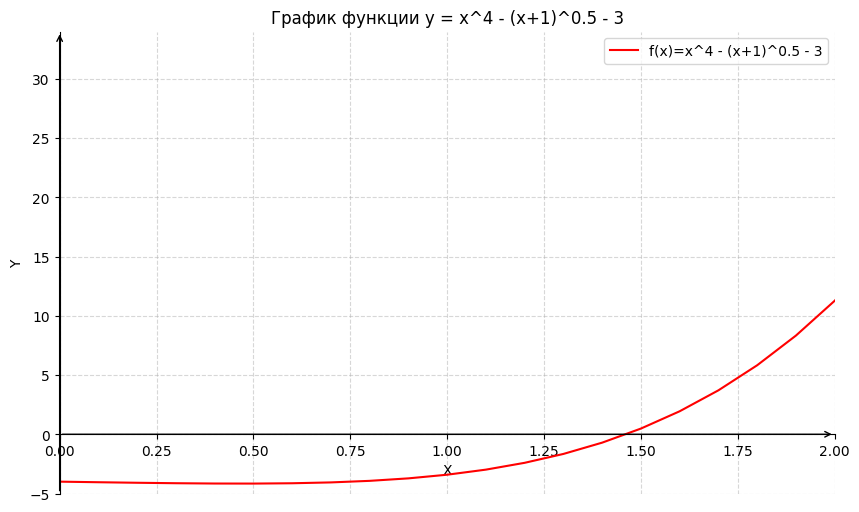

In [23]:
# Построение графика функции
plt.figure(figsize=(10, 6), facecolor='white')

plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.annotate('', xy=(2, 0), xytext=(0, 0),
             arrowprops=dict(arrowstyle='->', lw=1))
plt.annotate('', xy=(0, 34), xytext=(0, -5),
             arrowprops=dict(arrowstyle='->', lw=1))

x_smooth = np.arange(0, 3, 0.1)
y_smooth = f(x_smooth)
plt.plot(x_smooth, y_smooth, label='f(x)=x^4 - (x+1)^0.5 - 3', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График функции y = x^4 - (x+1)^0.5 - 3')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(0, 2)
plt.ylim(-5, 34)

plt.show()

In [24]:
eps = 1e-7
x_0 = 1.5

In [25]:
# Метод касательных
def tangent_method_recursive(x_k: float) -> float:
    print(round(x_k, 8))
    x_k1 = x_k - f(x_k) / derivative_f(x_k)
    if abs(x_k1 - x_k) < eps:
        return x_k1
    return tangent_method_recursive(x_k1)

x_solution_tm = tangent_method_recursive(x_0)
print(round(x_solution_tm, 8))

1.5
1.46515973
1.46219772
1.46204178
1.46203401
1.46203362
1.4620336


In [26]:
# Метод хорд
def chord_method_recursive(x_k: float, a: float) -> float:
    print(round(x_k, 8))
    x_k1 = x_k - f(x_k) * (x_k - a) / (f(x_k) - f(a))
    if abs(x_k1 - x_k) < eps:
        return x_k1
    return chord_method_recursive(x_k1, a)

x_solution_cm = chord_method_recursive(x_0, 1.25)
print(round(x_solution_cm, 8))

1.5
1.45262109
1.46444759
1.46141974
1.46219004
1.46199375
1.46204375
1.46203102
1.46203426
1.46203343
1.46203364
1.46203359


In [27]:
# Метод секущих
def secant_method_recursive(x: float, x_prev: float) -> float:
    print(round(x, 8))
    x_new = x - f(x) * (x - x_prev) / (f(x) - f(x_prev))
    if abs(x_new - x) < eps:
        return x_new
    return secant_method_recursive(x_new, x)

x_solution_sm = secant_method_recursive(x_0, 1.4)
print(round(x_solution_sm, 8))

1.5
1.45951391
1.46193476
1.46203386
1.4620336
1.4620336


In [28]:
# Конечноразностный метод Ньютона
def finite_difference_method_recursive(x_k: float, h: float = 0.05) -> float:
    print(round(x_k, 8))
    x_k1 = x_k - h * f(x_k) / (f(x_k + h) - f(x_k))
    if abs(x_k1 - x_k) < eps:
        return x_k1
    return finite_difference_method_recursive(x_k1, h)

x_solution_fdm = finite_difference_method_recursive(x_0)
print(round(x_solution_fdm, 8))

1.5
1.46530846
1.46221163
1.46204275
1.46203407
1.46203362
1.4620336


In [29]:
# Метод Стеффенсена
def steffensen_method_recursive(x_k: float) -> float:
    print(round(x_k, 8))
    x_k1 = x_k - f(x_k) ** 2 / (f(x_k + f(x_k)) - f(x_k))
    if abs(x_k1 - x_k) < eps:
        return x_k1
    return steffensen_method_recursive(x_k1)

x_solution_stm = steffensen_method_recursive(x_0)
print(round(x_solution_stm, 8))

1.5
1.47729198
1.46492614
1.4621475
1.46203378
1.4620336
1.4620336


In [30]:
min_derivative_f = minimize_scalar(derivative_f, bounds=(1.25, x_0), method='bounded').fun  #8.14595123
max_tau = 2 / min_derivative_f  #0.24552074

tau = 0.1

# Метод простых итераций
def simple_iterations_method_recursive(x_k: float) -> float:
    print(round(x_k, 8))
    x_k1 = x_k - tau * f(x_k)
    if abs(x_k1 - x_k) < eps:
        return x_k1
    return simple_iterations_method_recursive(x_k1)

x_solution_sim = simple_iterations_method_recursive(x_0)
print(round(x_solution_sim, 8))

1.5
1.45186388
1.46412025
1.4615727
1.4621339
1.4620117
1.46203838
1.46203256
1.46203383
1.46203355
1.46203361


In [31]:
min_abs_derivative_f = minimize_scalar(abs_derivative_f, bounds=(1.25, x_0), method='bounded').fun

# Поиск погрешностей
def error(x_k: float) -> float:
    return abs(f(x_k)) / min_abs_derivative_f

print(error(x_solution_tm))
print(error(x_solution_cm))
print(error(x_solution_sm))
print(error(x_solution_fdm))
print(error(x_solution_stm))
print(error(x_solution_sim))

1.5039798073934238e-09
1.628174661511233e-08
1.090331128652807e-16
1.8385438254788051e-09
1.090331128652807e-16
1.6194565373561942e-08
